# 18 Clothing Categories

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

We import all the necessary packages. We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
torch.cuda.set_device(0)

## Looking at the data

Classification of Cloth Categories

Large-scale Fashion Recognition and Retrieval (DeepFashion) Dataset 
Category and Attribute Prediction Benchmark

By Multimedia Lab, The Chinese University of Hong Kong


For more information about the dataset, visit the project website:

  http://mmlab.ie.cuhk.edu.hk/projects/DeepFashion.html


  @inproceedings{liu2016deepfashion,
 	author = {Ziwei Liu, Ping Luo, Shi Qiu, Xiaogang Wang, and Xiaoou Tang},
 	title = {DeepFashion: Powering Robust Clothes Recognition and Retrieval with Rich Annotations},
 	booktitle = {Proceedings of IEEE Conference on Computer Vision and Pattern Recognition (CVPR)},
 	month = June,
 	year = {2016} 
  }

In [4]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# Pathes


In [0]:
# path = Path("/Users/vv/PycharmProjects/DeepFashion/dataset/img/")
# path = Path("/mount_disk_200/deep_fashion_dataset/dataset/img/")


root_dir = "/content/gdrive/My Drive/Colab/Colab Notebooks/"
path = Path(root_dir + "/dataset/img/")

In [6]:
img_dir_path = path/"img"
len(img_dir_path.ls())

167

In [7]:
fnames = get_image_files(img_dir_path/"Zip-Up_Puffer_Jacket")
fnames[:5]

[PosixPath('/content/gdrive/My Drive/Colab/Colab Notebooks/dataset/img/img/Zip-Up_Puffer_Jacket/img_00000002.jpg'),
 PosixPath('/content/gdrive/My Drive/Colab/Colab Notebooks/dataset/img/img/Zip-Up_Puffer_Jacket/img_00000038.jpg'),
 PosixPath('/content/gdrive/My Drive/Colab/Colab Notebooks/dataset/img/img/Zip-Up_Puffer_Jacket/img_00000015.jpg'),
 PosixPath('/content/gdrive/My Drive/Colab/Colab Notebooks/dataset/img/img/Zip-Up_Puffer_Jacket/img_00000003.jpg'),
 PosixPath('/content/gdrive/My Drive/Colab/Colab Notebooks/dataset/img/img/Zip-Up_Puffer_Jacket/img_00000016.jpg')]

Lets clean our csv file. As it is more extened than we need, we have to check what file are in the google disk and save only them to csv.

In [8]:
import pandas as pd
import os
df = pd.read_csv(root_dir + "/dataset/img/train_labels.csv")
csv_path = Path(root_dir + "dataset/img/")

df.head()



,image_name,category_name
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,Blouse
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,Blouse
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,Blouse
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,Blouse
4,img/Sheer_Pleated-Front_Blouse/img_00000006.jpg,Blouse


In [9]:
#changed the pathes in file
# df['image_name'] = [Path(csv_path, x) for x in df['image_name']]
#left only existing files
df1 = df[[Path(csv_path/df.loc[x, "image_name"]).exists() for x in range(df.shape[0])]]
print(df1.shape)
df1.to_csv(path/"train_labels_colab2.csv", index=False)


(8332, 2)


In [0]:
tfms = get_transforms(max_rotate=10.0, max_zoom=1.1, 
                       max_lighting=0.2, max_warp=0.2, 
                       p_affine=0.75, p_lighting=0.75, 
                       xtra_tfms=[flip_lr(), crop_pad(size=299), squish(), cutout()])

# tfms = [_tfms[0]+[flip_lr(), pad(padding=200)], _tfms[1]]
def get_ex(): return open_image(path/'img_00000056.jpg')

def plots_f(rows, cols, width, height, **kwargs):
    [get_ex().apply_tfms(tfms[0], **kwargs).show(ax=ax) 
     for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


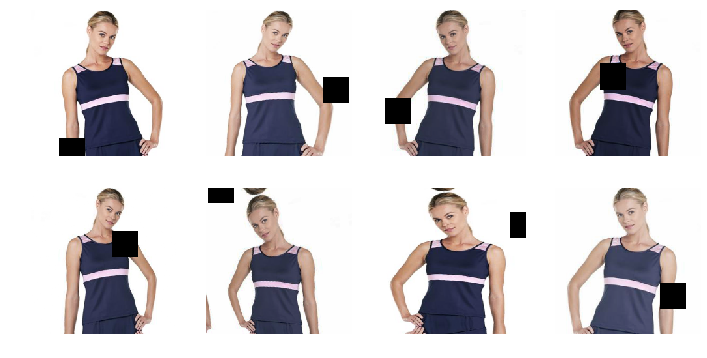

In [11]:
plots_f(2, 4, 12, 6, size=224)

In [12]:
np.random.seed(42)
# train_labels_path = "data/cloth_categories/train_labels.csv"
# train_labels_path = "/home/ubuntu/deepfashion/data/cloth_categories"

# train_labels_path = Path(root_dir + "train_labels_colab.csv")
# print(train_labels_path)

data = ImageDataBunch.from_csv(path, csv_labels="train_labels_colab2.csv", ds_tfms=tfms, size=224, bs=128)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (6666 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Bomber,Bomber,Bomber,Bomber,Bomber
Path: /content/gdrive/My Drive/Colab/Colab Notebooks/dataset/img;

Valid: LabelList (1666 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Dress,Jacket,Tee,Shorts,Skirt
Path: /content/gdrive/My Drive/Colab/Colab Notebooks/dataset/img;

Test: None

In [15]:
df = pd.read_csv(path/"train_labels_colab2.csv")
df.category_name.value_counts()

Dress          1697
Tee            1267
Skirt           614
Jacket          597
Blazer          535
Shorts          449
Sweater         441
Tank            393
Joggers         327
Hoodie          305
Sweatpants      287
Leggings        276
Bomber          270
Blouse          268
Romper          172
Cardigan        145
Jumpsuit        117
Jeans            59
Flannel          41
Sweatshorts      39
Culottes         33
Name: category_name, dtype: int64

In [16]:
help(ImageDataBunch.from_csv)

Help on method from_csv in module fastai.vision.data:

from_csv(path:Union[pathlib.Path, str], folder:Union[pathlib.Path, str]=None, label_delim:str=None, csv_labels:Union[pathlib.Path, str]='labels.csv', valid_pct:float=0.2, fn_col:int=0, label_col:int=1, suffix:str='', delimiter:str=None, header:Union[int, str, NoneType]='infer', **kwargs:Any) -> 'ImageDataBunch' method of builtins.type instance
    Create from a csv file in `path/csv_labels`.



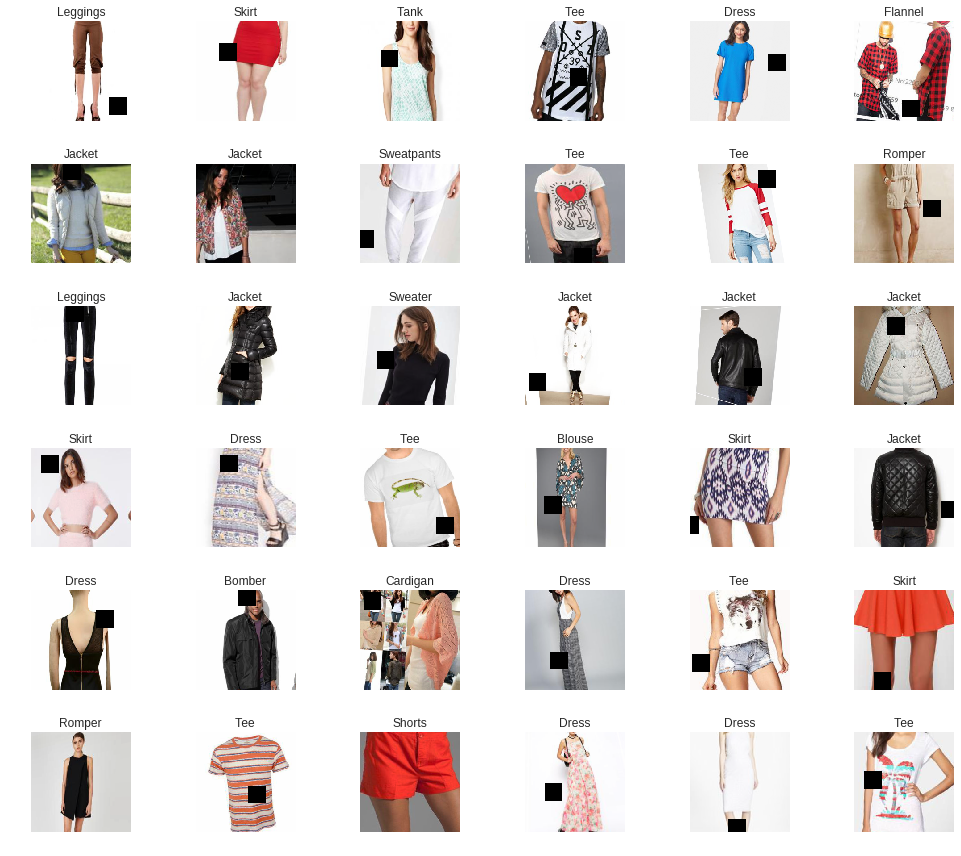

In [17]:
data.show_batch(rows=6, figsize=(14,12))

In [18]:
print(data.classes)
len(data.classes),data.c

['Blazer', 'Blouse', 'Bomber', 'Cardigan', 'Culottes', 'Dress', 'Flannel', 'Hoodie', 'Jacket', 'Jeans', 'Joggers', 'Jumpsuit', 'Leggings', 'Romper', 'Shorts', 'Skirt', 'Sweater', 'Sweatpants', 'Sweatshorts', 'Tank', 'Tee']


(21, 21)

## Training: resnet34

Now we will start training our model. We will use a [convolutional neural network](http://cs231n.github.io/convolutional-networks/) backbone and a fully connected head with a single hidden layer as a classifier. Don't know what these things mean? Not to worry, we will dive deeper in the coming lessons. For the moment you need to know that we are building a model which will take images as input and will output the predicted probability for each of the categories (in this case, it will have 37 ouptuts).

We will train for 10 epochs (10 cycles through all our data).

In [19]:
learn = create_cnn(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:00, 88778148.68it/s]


In [20]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


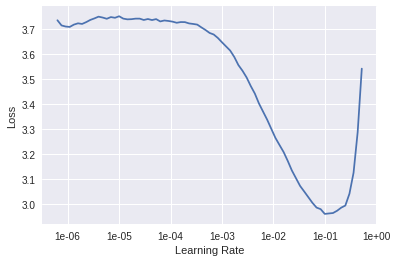

In [21]:
learn.recorder.plot()

In [22]:
lr = 1e-2
learn.fit_one_cycle(10, slice(lr))

epoch,train_loss,valid_loss,accuracy,time
1,2.510164,1.605082,0.537215,07:28
2,1.862743,1.375158,0.562425,02:27
3,1.598866,1.325201,0.587635,02:27
4,1.450366,1.197060,0.625450,02:28
5,1.317811,1.173393,0.639256,02:27
6,1.199385,1.160585,0.632053,02:27
7,1.104511,1.132402,0.651260,02:27
8,1.035885,1.110887,0.660864,02:28
9,0.967100,1.097230,0.663265,02:29
10,0.933508,1.098624,0.665066,02:29


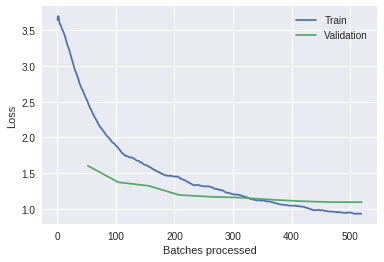

In [23]:
learn.recorder.plot_losses()

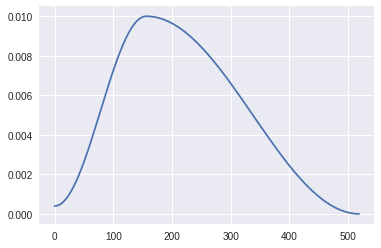

In [24]:
learn.recorder.plot_lr()

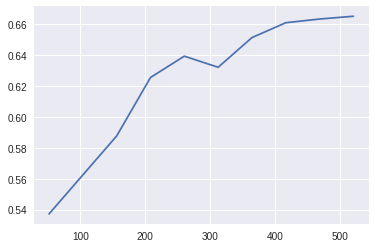

In [25]:
learn.recorder.plot_metrics()

In [0]:
learn.save(path/'stage-1_sz-224')

In [0]:
learn.export()


### Visualize and Analyze

Let's see what results we have got. 

We will first see which were the categories that the model most confused with one another. We will try to see if what the model predicted was reasonable or not. In this case the mistakes look reasonable (none of the mistakes seems obviously naive). This is an indicator that our classifier is working correctly. 

Furthermore, when we plot the confusion matrix, we can see that the distribution is heavily skewed: the model makes the same mistakes over and over again but it rarely confuses other categories. This suggests that it just finds it difficult to distinguish some specific categories between each other; this is normal behaviour.

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

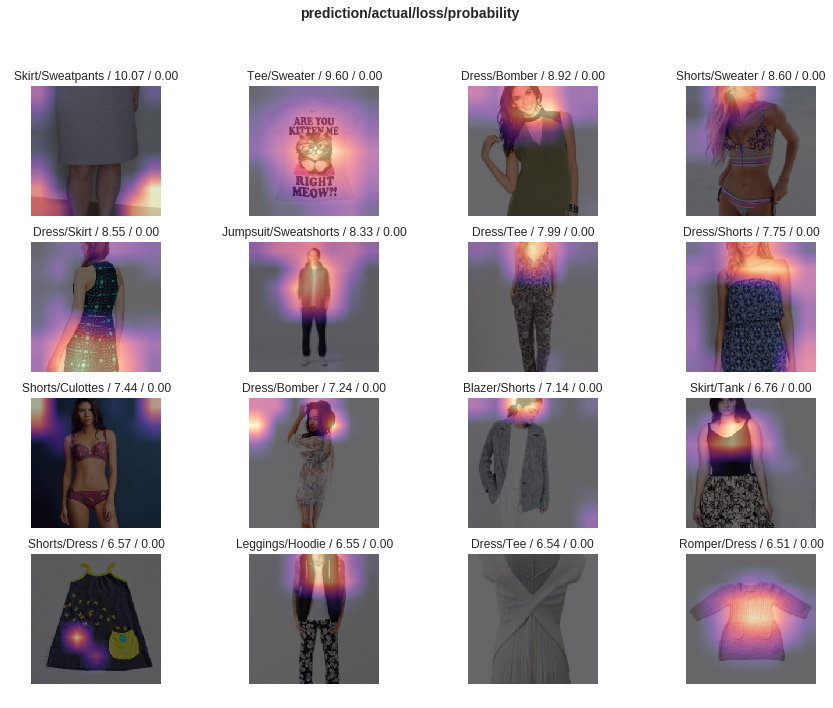

In [29]:
interp.plot_top_losses(16, figsize=(15,11))

In [30]:
interp.most_confused()

[('Skirt', 'Dress', 23),
 ('Tee', 'Dress', 21),
 ('Shorts', 'Skirt', 18),
 ('Bomber', 'Jacket', 17),
 ('Tank', 'Tee', 17),
 ('Jacket', 'Blazer', 16),
 ('Blazer', 'Jacket', 15),
 ('Jacket', 'Bomber', 14),
 ('Romper', 'Dress', 14),
 ('Sweatpants', 'Joggers', 12),
 ('Tee', 'Sweater', 11),
 ('Dress', 'Sweater', 10),
 ('Skirt', 'Shorts', 10),
 ('Tank', 'Dress', 10),
 ('Joggers', 'Leggings', 9),
 ('Joggers', 'Sweatpants', 9),
 ('Sweater', 'Tee', 9),
 ('Blouse', 'Dress', 8),
 ('Shorts', 'Dress', 8),
 ('Sweater', 'Cardigan', 8),
 ('Hoodie', 'Jacket', 7),
 ('Blazer', 'Cardigan', 6),
 ('Jeans', 'Leggings', 6),
 ('Leggings', 'Joggers', 6),
 ('Shorts', 'Tee', 6),
 ('Sweater', 'Jacket', 6),
 ('Tee', 'Tank', 6),
 ('Blazer', 'Dress', 5),
 ('Blazer', 'Sweater', 5),
 ('Blouse', 'Skirt', 5),
 ('Bomber', 'Blazer', 5),
 ('Bomber', 'Hoodie', 5),
 ('Dress', 'Blouse', 5),
 ('Jacket', 'Hoodie', 5),
 ('Sweatshorts', 'Sweatpants', 5),
 ('Dress', 'Tee', 4),
 ('Hoodie', 'Tee', 4),
 ('Jacket', 'Tee', 4),
 ('Jogger

In [0]:
# This is for accuracy in top 3 -
def accuracy_topk(output, target, topk=(3,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)

    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0, keepdim=True)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res

In [32]:
# FOR TOP-1 Accuracy
accuracy_topk(output=interp.probs, target=interp.y_true, topk=(1,))

[tensor([66.5066])]

In [33]:
# FOR TOP-3 Accuracy
accuracy_topk(output=interp.probs, target=interp.y_true, topk=(3,))

[tensor([86.8547])]

In [34]:
# FOR TOP-5 Accuracy
accuracy_topk(output=interp.probs, target=interp.y_true, topk=(5,))

[tensor([92.9772])]

## Unfreezing, fine-tuning, and learning rates

Since our model is working as we expect it to, we will *unfreeze* our model and train some more.

In [0]:
learn.load(path/'stage-1_sz-224')
learn.unfreeze()

In [36]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


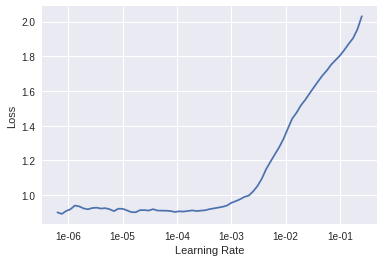

In [37]:
learn.recorder.plot()

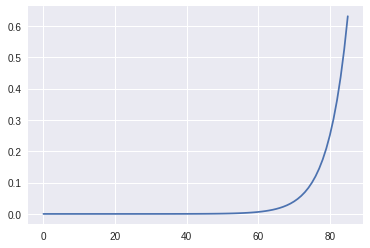

In [38]:
learn.recorder.plot_lr()

In [0]:
?? learn.fit_one_cycle

In [39]:
learn.fit_one_cycle(10, slice(1e-6, lr/10))

epoch,train_loss,valid_loss,accuracy,time
1,0.904278,1.087736,0.670468,02:27
2,0.899681,1.085908,0.674670,02:25
3,0.873254,1.066181,0.678872,02:23
4,0.818824,1.062153,0.682473,02:24
5,0.752088,1.060920,0.686074,02:20
6,0.689668,1.055558,0.687275,02:20
7,0.633200,1.052708,0.694478,02:21
8,0.586687,1.051107,0.694478,02:18
9,0.552233,1.055987,0.693878,02:19
10,0.532421,1.050449,0.693277,02:16


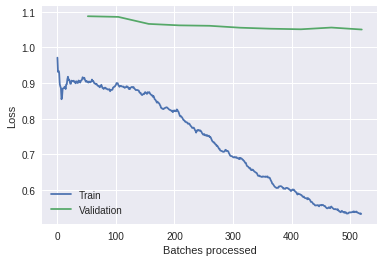

In [40]:
learn.recorder.plot_losses()


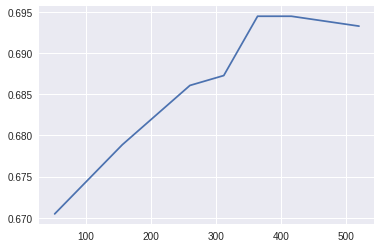

In [41]:
learn.recorder.plot_metrics()

In [0]:
learn.save(path/'stage-2-34_693sz-224')

In [0]:
learn.export(fname="export_unfreeze_693.pkl")


### Visualize and Analyze

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

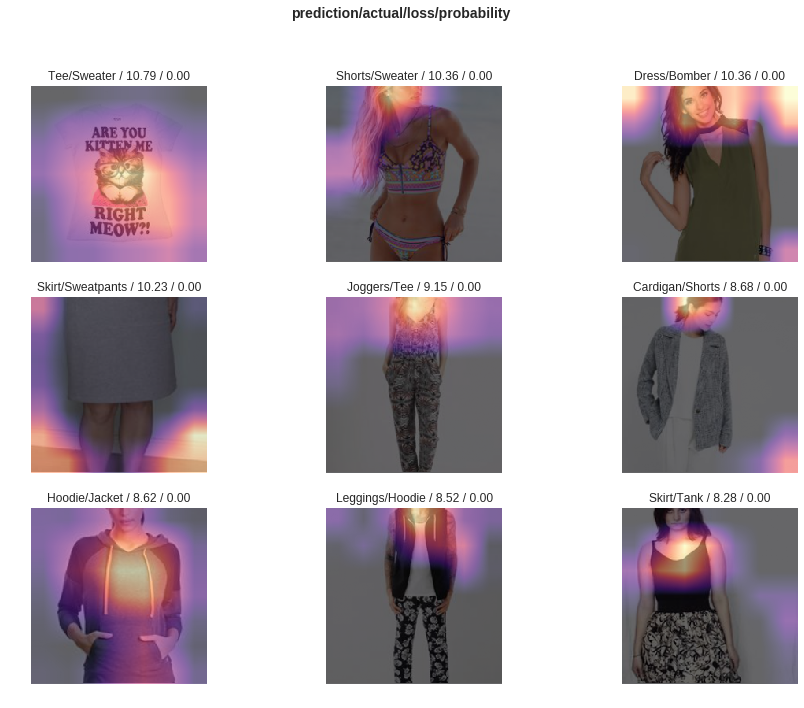

In [46]:
interp.plot_top_losses(9, figsize=(15,11))

In [47]:
interp.most_confused(min_val=5)

[('Bomber', 'Jacket', 19),
 ('Jacket', 'Bomber', 16),
 ('Skirt', 'Dress', 16),
 ('Jacket', 'Blazer', 15),
 ('Shorts', 'Skirt', 15),
 ('Tank', 'Tee', 15),
 ('Sweatpants', 'Joggers', 13),
 ('Blazer', 'Jacket', 12),
 ('Joggers', 'Sweatpants', 12),
 ('Romper', 'Dress', 12),
 ('Tee', 'Dress', 12),
 ('Sweater', 'Tee', 11),
 ('Tee', 'Sweater', 11),
 ('Dress', 'Sweater', 8),
 ('Joggers', 'Leggings', 8),
 ('Skirt', 'Shorts', 8),
 ('Tee', 'Tank', 8),
 ('Hoodie', 'Jacket', 7),
 ('Shorts', 'Dress', 7),
 ('Shorts', 'Tee', 7),
 ('Tank', 'Dress', 7),
 ('Blazer', 'Cardigan', 6),
 ('Blouse', 'Tee', 6),
 ('Dress', 'Tee', 6),
 ('Sweater', 'Cardigan', 6),
 ('Sweater', 'Jacket', 6),
 ('Blouse', 'Sweater', 5),
 ('Dress', 'Skirt', 5),
 ('Hoodie', 'Tee', 5),
 ('Leggings', 'Joggers', 5)]

In [48]:
# FOR TOP-1 Accuracy
accuracy_topk(output=interp.probs, target=interp.y_true, topk=(1,))

[tensor([69.3277])]

In [49]:
# FOR TOP-3 Accuracy
accuracy_topk(output=interp.probs, target=interp.y_true, topk=(3,))

[tensor([88.5954])]

In [50]:
# FOR TOP-5 Accuracy
accuracy_topk(output=interp.probs, target=interp.y_true, topk=(5,))

[tensor([93.9376])]

## Training: resnet50

Now we will train in the same way as before but with one caveat: instead of using resnet34 as our backbone we will use resnet50 (resnet34 is a 34 layer residual network while resnet50 has 50 layers. Later in the course you can learn the details in the [resnet paper](https://arxiv.org/pdf/1512.03385.pdf)).

Basically, resnet50 usually performs better because it is a deeper network with more parameters. Let's see if we can achieve a higher performance here.

In [0]:
data = ImageDataBunch.from_csv(path, csv_labels="train_labels.csv" , ds_tfms=get_transforms(), size=150)
data.normalize(imagenet_stats)

In [0]:
learn = create_cnn(data, models.resnet50, metrics=accuracy)

In [0]:
#Before Unfreezing let's see how much effetive is resnet50
learn.fit_one_cycle(10)

Total time: 1:06:16
epoch  train loss  valid loss  accuracy
1      1.512322    1.378405    0.591510  (07:05)
2      1.460747    1.313164    0.610546  (06:38)
3      1.424844    1.293233    0.615064  (06:33)
4      1.387585    1.262758    0.627062  (06:33)
5      1.344407    1.243693    0.633011  (06:34)
6      1.322759    1.209210    0.642388  (06:34)
7      1.302737    1.195776    0.644001  (06:34)
8      1.239320    1.168905    0.652107  (06:34)
9      1.227643    1.161255    0.655798  (06:33)
10     1.220576    1.159316    0.656443  (06:34)



In [0]:
# let's save model for further unfreeze training
learn.save('stage-1_arch-50_sz-150')

### Visualize and Analyze

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

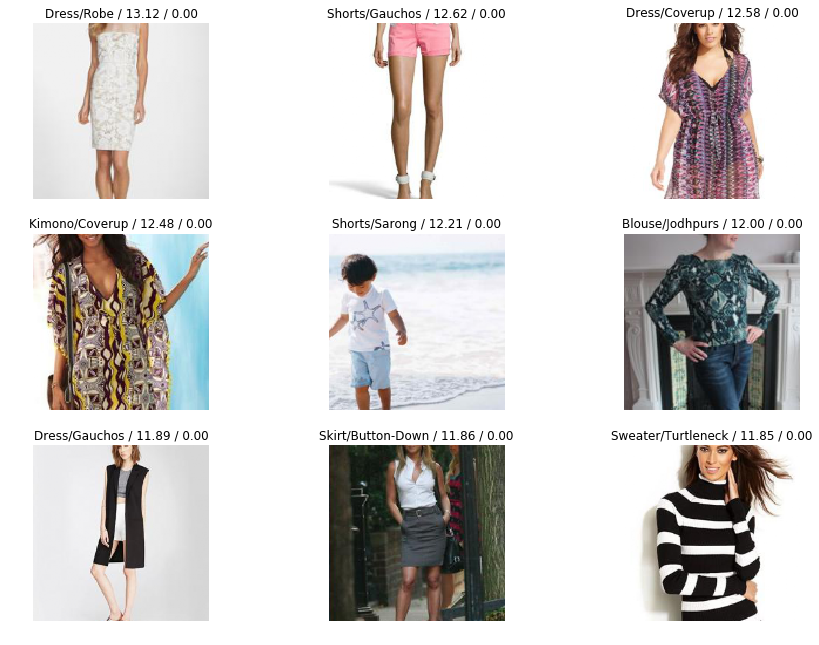

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
interp.most_confused(min_val=80)

[('Top', 'Blouse', 477),
 ('Romper', 'Dress', 458),
 ('Skirt', 'Dress', 444),
 ('Top', 'Tee', 440),
 ('Tank', 'Tee', 401),
 ('Tee', 'Blouse', 394),
 ('Blouse', 'Tee', 373),
 ('Blouse', 'Dress', 359),
 ('Cardigan', 'Sweater', 324),
 ('Tee', 'Tank', 310),
 ('Jumpsuit', 'Dress', 308),
 ('Tee', 'Dress', 272),
 ('Sweater', 'Tee', 240),
 ('Cutoffs', 'Shorts', 219),
 ('Blazer', 'Jacket', 217),
 ('Tank', 'Dress', 212),
 ('Tee', 'Sweater', 207),
 ('Tank', 'Blouse', 202),
 ('Top', 'Tank', 202),
 ('Sweater', 'Cardigan', 190),
 ('Top', 'Dress', 187),
 ('Dress', 'Blouse', 171),
 ('Jacket', 'Blazer', 168),
 ('Shorts', 'Tee', 167),
 ('Shorts', 'Skirt', 166),
 ('Dress', 'Skirt', 156),
 ('Blouse', 'Tank', 155),
 ('Cardigan', 'Blouse', 143),
 ('Sweatpants', 'Joggers', 142),
 ('Tee', 'Shorts', 139),
 ('Skirt', 'Shorts', 138),
 ('Jacket', 'Cardigan', 132),
 ('Cardigan', 'Jacket', 128),
 ('Sweater', 'Blouse', 127),
 ('Cardigan', 'Dress', 127),
 ('Shorts', 'Blouse', 123),
 ('Top', 'Sweater', 121),
 ('Dress'

In [0]:
# This is for accuracy in top 3 -
def accuracy_topk(output, target, topk=(3,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)

    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0, keepdim=True)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res

In [0]:
# FOR TOP-3 Accuracy
accuracy_topk(output=interp.y_pred, target=interp.y_true, topk=(3,))

[tensor([85.9911])]

In [0]:
# FOR TOP-5 Accuracy
accuracy_topk(output=interp.y_pred, target=interp.y_true, topk=(5,))

[tensor([92.5489])]

## Unfreezing, fine-tuning, and learning rates

Since our model is working as we expect it to, we will *unfreeze* our model and train some more.

In [0]:
learn.load('stage-1_arch-50_sz-150')
learn.lr_find()

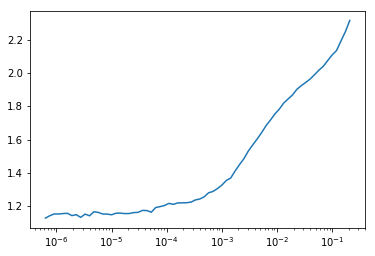

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()

In [0]:

learn.fit_one_cycle(10, max_lr=slice(1e-6,1e-5))

In [0]:
learn.save('stage-1_arch-50_sz-150-unfreeze')

### Visualize and Analyze

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
interp.most_confused(min_val=80)

In [0]:
# FOR TOP-3 Accuracy
accuracy_topk(output=interp.y_pred, target=interp.y_true, topk=(3,))

In [0]:
# FOR TOP-5 Accuracy
accuracy_topk(output=interp.y_pred, target=interp.y_true, topk=(5,))

## Training: resnet152

Now we will train in the same way as before but with one caveat: instead of using resnet34 as our backbone we will use resnet152 (resnet34 is a 34 layer residual network while resnet152 has 152 layers. Later in the course you can learn the details in the [resnet paper](https://arxiv.org/pdf/1512.03385.pdf)).

Basically, resnet152 usually performs better because it is a deeper network with more parameters. Let's see if we can achieve a higher performance here.

In [0]:
data = ImageDataBunch.from_csv(path, ds_tfms=get_transforms(), size=299, bs=32)
data.normalize(imagenet_stats)

In [0]:
learn = create_cnn(data, models.resnet152, metrics=accuracy)

In [0]:
#Before Unfreezing let's see how much effetive is resnet100
learn.fit_one_cycle(5)

In [0]:
# let's save model for further unfreez training
learn.save('stage-1-100')

In [0]:
# let's find optimal learning rate
learn.lr_find()
learn.recorder.plot()

In [0]:
# Unfreeze Resnet to apply new optimal learning rate
learn.unfreeze()
# train for 1 cycle to see if metrics is improving
learn.fit_one_cycle(1, max_lr=slice(1e-6,1e-4))

In [0]:
# It did improved so let's train it for 5 more cycle
learn.fit_one_cycle(5, max_lr=slice(1e-6,1e-4))